In [1]:
from nepc import nepc
from nepc.util import plotter
from nepc.util import config
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [2]:
pd.set_option('max_colwidth', 120)

In [3]:
cnx, cursor = nepc.connect(local=True)

In [4]:
states = nepc.table_as_df(cursor, "states")
states

,0,1,2,3
0,1,4,N++,N${}^{++}$
1,2,3,N+,N${}^+$
2,3,3,N+_2s22p2_3P,N${}^+$
3,4,3,N+_2s12p3_1D,N${}^+$
4,5,3,N+_2s12p3_1S,N${}^+$
5,6,6,N2+,N${}_2^+$
6,7,6,N2+(C2Sigmau+),N${}^+_2$
7,8,6,N2+(C2Sigmau+),N${}^+_2$
8,9,6,N2+(B2Sigmau+),N${}^+_2$
9,10,6,N2+(B2Sigmau+),N${}^+_2$


In [5]:
species = nepc.table_as_df(cursor, "species")
species

,0,1,2
0,1,N,N
1,2,N-,N$^-$
2,3,N+,N$^+$
3,4,N++,N$^{++}$
4,5,N2,N$_2$
5,6,N2+,N$_2^+$


In [6]:
NEPC_HOME = config.nepc_home()

In [7]:
models = nepc.table_as_df(cursor, "models")
models

,0,1,2
0,1,angus,cross sections used by J. Angus
1,2,pcm_n_1,plasma chemistry model - nitrogen - 1


In [8]:
processes = nepc.table_as_df(cursor, "processes")
processes

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,elastic,Total elastic electron scattering,1,1,1,1,0,0,0,0,0,0
1,2,elastic_partial,Partial elastic electron scattering,1,1,1,1,0,0,0,0,0,0
2,3,excitation,"Excitation of atoms (electronic), inelastic electron scattering",1,1,1,1,0,0,0,0,0,0
3,4,excitation_v,"Excitation of atoms (electronic + vibrational), inelastic electron scattering",1,1,1,1,0,0,1,1,0,0
4,5,excitation_j,"Excitation of atoms (electronic + rotational), inelastic electron scattering",1,1,1,1,0,0,0,0,1,1
5,6,excitation_vj,"Excitation of atoms (electronic + vibrational + rotational), inelastic electron scattering",1,1,1,1,0,0,1,1,1,1
6,7,s_deexcitation,Spontaneous de-excitation,1,1,0,0,0,1,0,0,0,0
7,8,s_deexcitation_v,Spontaneous de-excitation (vibrational),1,1,0,0,0,1,1,1,0,0
8,9,s_deexcitation_j,Spontaneous de-excitation (rotational),1,1,0,0,0,1,0,0,1,1
9,10,s_deexcitation_vj,Spontaneous de-excitation (vibrational and rotational),1,1,0,0,0,1,1,1,1,1


In [9]:
nepc.cs_e_sigma(cursor,1)

([14.54,
  17.5,
  20.0,
  25.0,
  30.0,
  40.0,
  50.0,
  60.0,
  70.0,
  80.0,
  90.0,
  100.0,
  125.0,
  150.0,
  200.0],
 [0.0,
  0.1362,
  0.25565,
  0.47867,
  0.70708,
  1.06851,
  1.28736,
  1.41708,
  1.49606,
  1.54735,
  1.5752899999999999,
  1.58483,
  1.56417,
  1.50594,
  1.33618])

In [10]:
angus = nepc.model(cursor, "angus")

In [11]:
len(angus)

367

In [12]:
angus_summary = nepc.model_summary_df(angus, lower=0, upper=24)
angus_summary

,cs_id,specie,process,reaction,E_lower,E_upper,sigma_max,lpu,upu
0,34,N,excitation,e$^-$ + N($2s^22p^3 $\rightarrow$ N($2s^22p^3 + e$^-$,2.39,135,8.84825e-21,-1,-1
1,35,N,excitation,e$^-$ + N($2s^22p^3 $\rightarrow$ N($2s^22p^3 + e$^-$,3.57,135,5.29548e-21,-1,-1
2,60,N,excitation,e$^-$ + N($2s^22p^3 $\rightarrow$ N($2s^22p^3 + e$^-$,3.57,135,7.94775e-21,-1,-1
3,399,N2,excitation,e$^-$ + N${}_2$ $\rightarrow$ N${}_2$ + e$^-$,7.65,14.85,2.57e-21,0.4,0.4
4,405,N2,excitation,e$^-$ + N${}_2$ $\rightarrow$ N${}_2$ + e$^-$,8,100,4.73e-21,0.25,0.25
5,401,N2,excitation,e$^-$ + N${}_2$ $\rightarrow$ N${}_2$ + e$^-$,8.55,50,3.39e-21,0.35,0.35
6,406,N2,excitation,e$^-$ + N${}_2$ $\rightarrow$ N${}_2$ + e$^-$,8.9,50,1.05e-21,0.3,0.3
7,402,N2,excitation,e$^-$ + N${}_2$ $\rightarrow$ N${}_2$ + e$^-$,9,50,2.38e-21,0.35,0.35
8,404,N2,excitation,e$^-$ + N${}_2$ $\rightarrow$ N${}_2$ + e$^-$,9.4,50,1.13e-21,0.3,0.3
9,403,N2,excitation,e$^-$ + N${}_2$ $\rightarrow$ N${}_2$ + e$^-$,10,50,1.65e-21,0.4,0.4


In [14]:
type(angus_summary)

pandas.io.formats.style.Styler

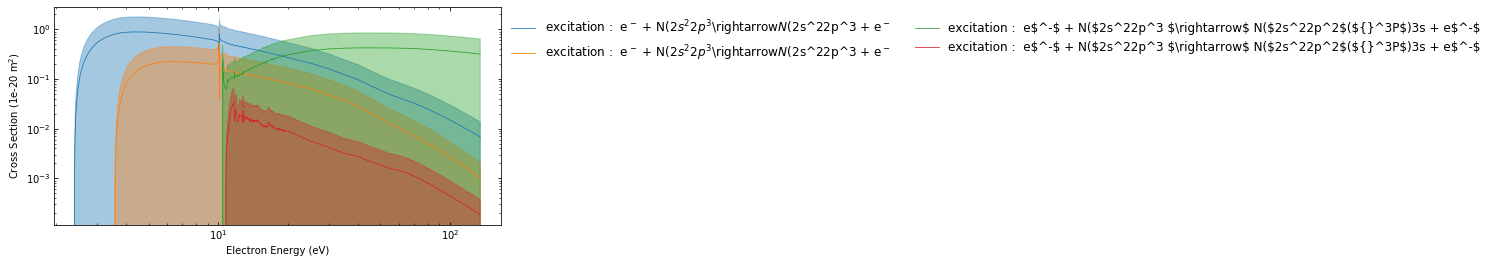

In [17]:
fig, ax = plt.subplots()
p1 = plotter.plot_nepc_model(ax, angus, 1E-20,
                        'excitation',
                        plot_param_dict = {'linewidth':.8}, 
                        #xlim_param_dict = {'left': 0.01, 'right': 120.0}, 
                        ylog=True, xlog=True, max_plots=4, width=8, height=4) 

In [20]:
ax

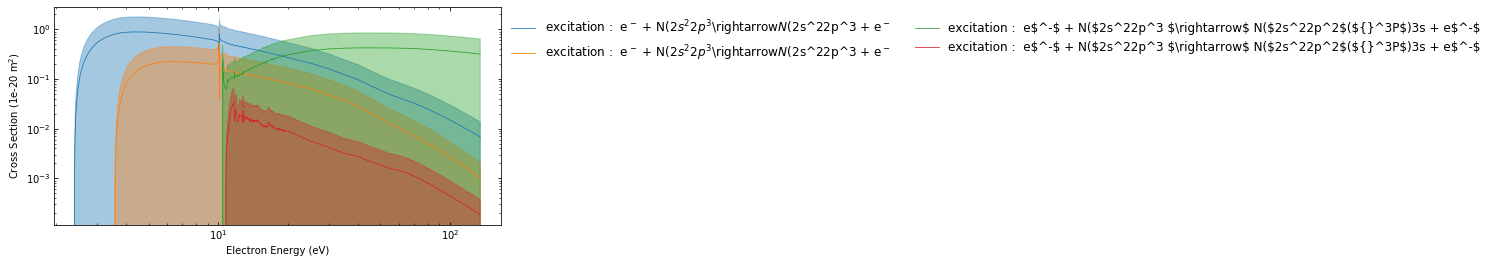

In [21]:
fig

In [22]:
type(fig)

matplotlib.figure.Figure

In [18]:
type(p1)

matplotlib.axes._subplots.AxesSubplot

In [19]:
p1

In [16]:
cnx.close()